In [31]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [32]:
train_main = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Train-1542865627584.csv")
train_beneficiary = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Train_Beneficiarydata-1542865627584.csv")
train_inpatient = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Train_Inpatientdata-1542865627584.csv")
train_outpatient = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Train_Outpatientdata-1542865627584.csv")

In [33]:
print("\n Beneficiary Data Preview:")
display(train_beneficiary.head())


 Beneficiary Data Preview:


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [34]:
print("\n Beneficiary Data Info:")
print(train_beneficiary.info())


 Beneficiary Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int

In [35]:
print("\n Missing Values in Beneficiary Data:")
print(train_beneficiary.isnull().sum())


 Missing Values in Beneficiary Data:
BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                 

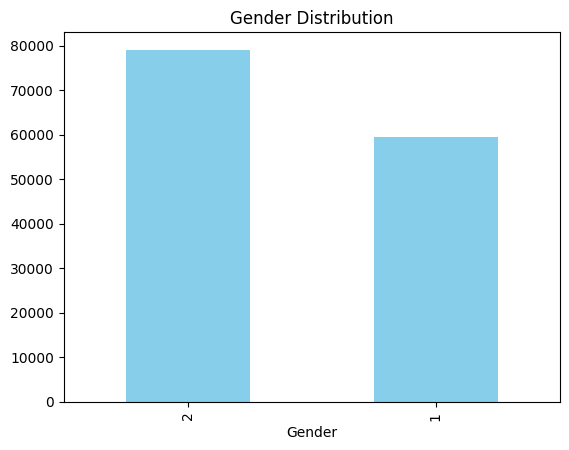

In [36]:
# Gender & Race distribution
train_beneficiary['Gender'].value_counts().plot(kind='bar', color='skyblue', title='Gender Distribution')
plt.show()

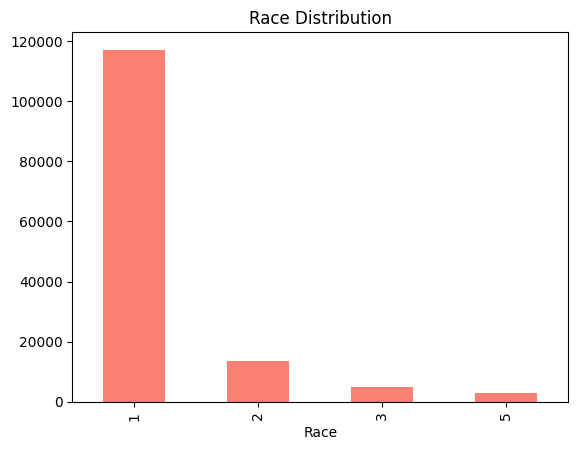

In [37]:
train_beneficiary['Race'].value_counts().plot(kind='bar', color='salmon', title='Race Distribution')
plt.show()

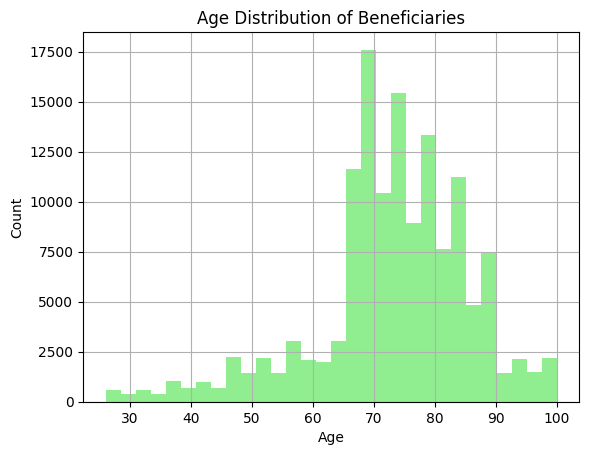

In [38]:
# Age distribution
train_beneficiary['DOB'] = pd.to_datetime(train_beneficiary['DOB'], errors='coerce')
train_beneficiary['Age'] = 2009 - train_beneficiary['DOB'].dt.year
train_beneficiary['Age'].hist(bins=30, color='lightgreen')
plt.title('Age Distribution of Beneficiaries')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

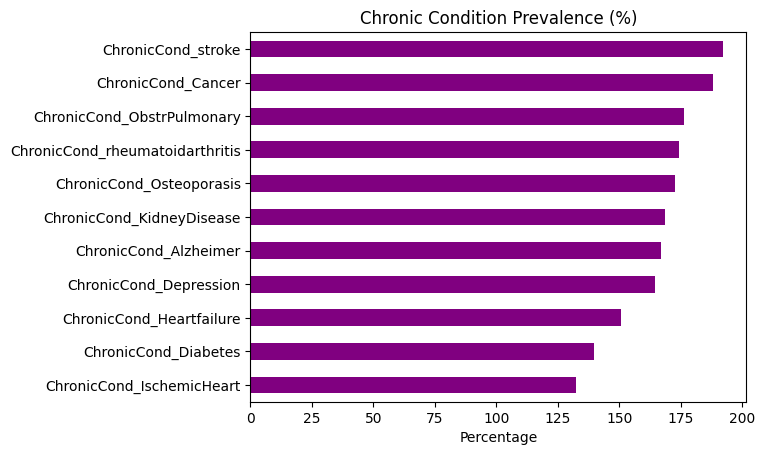

In [39]:
# Chronic Conditions
chronic_cols = [col for col in train_beneficiary.columns if 'ChronicCond' in col]
chronic_percentages = train_beneficiary[chronic_cols].mean() * 100
chronic_percentages.sort_values().plot(kind='barh', color='purple', title='Chronic Condition Prevalence (%)')
plt.xlabel('Percentage')
plt.show()

In [40]:
#  Exploratory Data Analysis Inpatient

In [41]:
print("\n Inpatient Data Preview:")
display(train_inpatient.head())


 Inpatient Data Preview:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [42]:
print("\n Inpatient Data Info:")
print(train_inpatient.info())


 Inpatient Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCod

In [43]:
print("\n Missing Values in Inpatient Data:")
print(train_inpatient.isnull().sum())


 Missing Values in Inpatient Data:
BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtyp

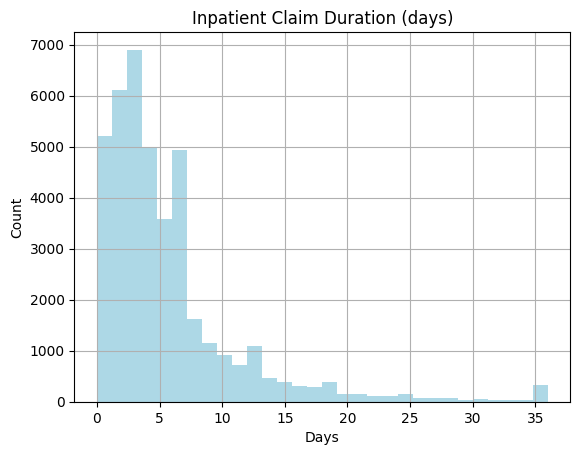

In [44]:
# Claim duration
train_inpatient['ClaimStartDt'] = pd.to_datetime(train_inpatient['ClaimStartDt'], errors='coerce')
train_inpatient['ClaimEndDt'] = pd.to_datetime(train_inpatient['ClaimEndDt'], errors='coerce')
train_inpatient['ClaimDuration'] = (train_inpatient['ClaimEndDt'] - train_inpatient['ClaimStartDt']).dt.days
train_inpatient['ClaimDuration'].hist(bins=30, color='lightblue')
plt.title('Inpatient Claim Duration (days)')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

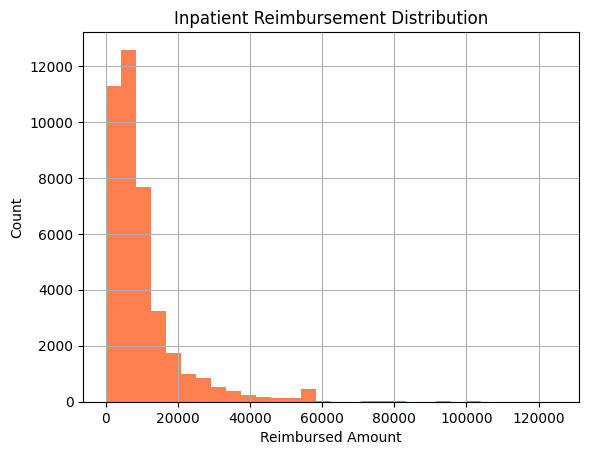

In [45]:
# Reimbursement
train_inpatient['InscClaimAmtReimbursed'].hist(bins=30, color='coral')
plt.title('Inpatient Reimbursement Distribution')
plt.xlabel('Reimbursed Amount')
plt.ylabel('Count')
plt.show()

In [46]:
#  Exploratory Data Analysis Outpatient

In [47]:
print("\n Outpatient Data Preview:")
display(train_outpatient.head())


 Outpatient Data Preview:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [48]:
print("\n Outpatient Data Info:")
print(train_outpatient.info())


 Outpatient Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 

In [49]:
print("\n Missing Values in Outpatient Data:")
print(train_outpatient.isnull().sum())


 Missing Values in Outpatient Data:
BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64


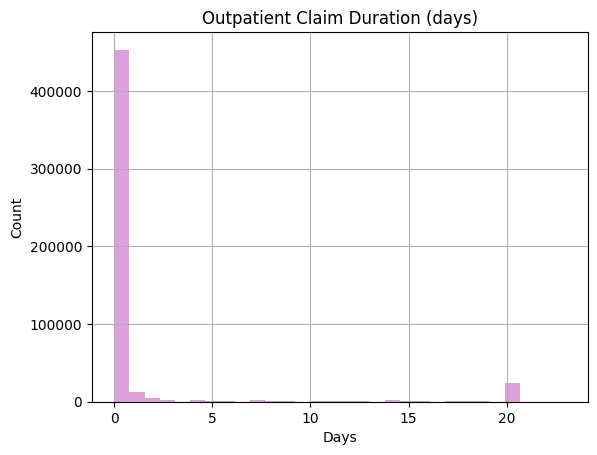

In [50]:
# Claim duration
train_outpatient['ClaimStartDt'] = pd.to_datetime(train_outpatient['ClaimStartDt'], errors='coerce')
train_outpatient['ClaimEndDt'] = pd.to_datetime(train_outpatient['ClaimEndDt'], errors='coerce')
train_outpatient['ClaimDuration'] = (train_outpatient['ClaimEndDt'] - train_outpatient['ClaimStartDt']).dt.days
train_outpatient['ClaimDuration'].hist(bins=30, color='plum')
plt.title('Outpatient Claim Duration (days)')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

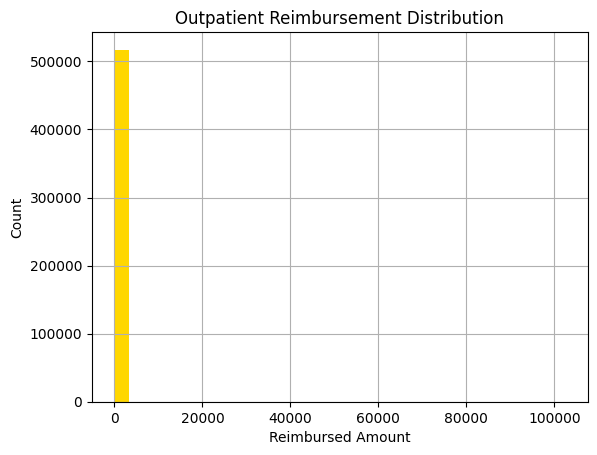

In [51]:
# Reimbursement
train_outpatient['InscClaimAmtReimbursed'].hist(bins=30, color='gold')
plt.title('Outpatient Reimbursement Distribution')
plt.xlabel('Reimbursed Amount')
plt.ylabel('Count')
plt.show()

In [52]:
#Prepare Training Data

In [53]:
def prepare_provider_features(main_df, beneficiary_df, inpatient_df, outpatient_df, is_train=True):
    common_cols = list(set(inpatient_df.columns).intersection(set(outpatient_df.columns)))
    claims_df = pd.concat([inpatient_df[common_cols], outpatient_df[common_cols]], ignore_index=True)

    claims_df['BeneID'] = claims_df['BeneID'].astype(str)
    beneficiary_df['BeneID'] = beneficiary_df['BeneID'].astype(str)
    claims_df = pd.merge(claims_df, beneficiary_df, on='BeneID', how='left')

    claims_df['ClaimStartDt'] = pd.to_datetime(claims_df['ClaimStartDt'], errors='coerce')
    claims_df['ClaimEndDt'] = pd.to_datetime(claims_df['ClaimEndDt'], errors='coerce')
    claims_df['ClaimDuration'] = (claims_df['ClaimEndDt'] - claims_df['ClaimStartDt']).dt.days

    if 'Age' not in claims_df.columns:
        claims_df['DOB'] = pd.to_datetime(claims_df['DOB'], errors='coerce')
        claims_df['Age'] = 2009 - claims_df['DOB'].dt.year

    chronic_cols = [col for col in claims_df.columns if 'ChronicCond' in col]

    provider_features = claims_df.groupby('Provider').agg(
        total_claims=('ClaimID', 'count'),
        total_reimbursement=('InscClaimAmtReimbursed', 'sum'),
        average_reimbursement=('InscClaimAmtReimbursed', 'mean'),
        max_reimbursement=('InscClaimAmtReimbursed', 'max'),
        min_reimbursement=('InscClaimAmtReimbursed', 'min'),
        std_reimbursement=('InscClaimAmtReimbursed', 'std'),
        unique_beneficiaries=('BeneID', pd.Series.nunique),
        average_claim_duration=('ClaimDuration', 'mean'),
        max_claim_duration=('ClaimDuration', 'max'),
        min_claim_duration=('ClaimDuration', 'min'),
        average_patient_age=('Age', 'mean'),
        male_ratio=('Gender', lambda x: (x == 1).mean()),
        female_ratio=('Gender', lambda x: (x == 2).mean()),
    )

    for col in chronic_cols:
        provider_features[f'{col}_ratio'] = claims_df.groupby('Provider')[col].apply(lambda x: (x == 1).mean())

    provider_features.fillna(0, inplace=True)

    if is_train:
        main_df['FraudLabel'] = main_df['PotentialFraud'].map({'Yes': 1, 'No': 0})
        final_df = pd.merge(main_df[['Provider', 'FraudLabel']], provider_features, left_on='Provider', right_index=True, how='left')
    else:
        final_df = pd.merge(main_df[['Provider']], provider_features, left_on='Provider', right_index=True, how='left')

    final_df.fillna(0, inplace=True)
    return final_df

In [54]:
# Prepare training features and labels
train_df = prepare_provider_features(train_main, train_beneficiary, train_inpatient, train_outpatient, is_train=True)
X_train = train_df.drop(columns=['Provider', 'FraudLabel'])
y_train = train_df['FraudLabel']

# Train-test split for evaluation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [55]:
# Calculate safe scale_pos_weight
positive_count = (y_tr == 1).sum()
negative_count = (y_tr == 0).sum()
scale_pos_weight = negative_count / positive_count if positive_count != 0 else 1

# Initialize and train XGBoost
xgb_clf = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    scale_pos_weight=scale_pos_weight,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

xgb_clf.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    verbose=10
)


[0]	validation_0-auc:0.94958
[10]	validation_0-auc:0.95883
[20]	validation_0-auc:0.96068
[30]	validation_0-auc:0.96310
[40]	validation_0-auc:0.96265
[50]	validation_0-auc:0.96341
[60]	validation_0-auc:0.96229
[70]	validation_0-auc:0.96171
[80]	validation_0-auc:0.95985
[90]	validation_0-auc:0.95859
[100]	validation_0-auc:0.95847
[110]	validation_0-auc:0.95789
[120]	validation_0-auc:0.95738
[130]	validation_0-auc:0.95619
[140]	validation_0-auc:0.95588


/home/mubasshir/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [00:35:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[150]	validation_0-auc:0.95532
[160]	validation_0-auc:0.95542
[170]	validation_0-auc:0.95455
[180]	validation_0-auc:0.95410
[190]	validation_0-auc:0.95424
[200]	validation_0-auc:0.95361
[210]	validation_0-auc:0.95261
[220]	validation_0-auc:0.95242
[230]	validation_0-auc:0.95250
[240]	validation_0-auc:0.95250
[250]	validation_0-auc:0.95226
[260]	validation_0-auc:0.95226
[270]	validation_0-auc:0.95189
[280]	validation_0-auc:0.95203
[290]	validation_0-auc:0.95193
[299]	validation_0-auc:0.95195


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [56]:
# Evaluate XGBoost
xgb_probs = xgb_clf.predict_proba(X_val)[:, 1]
xgb_preds = (xgb_probs >= 0.5).astype(int)

In [57]:
print("\n XGBoost Classification Report:")
print(classification_report(y_val, xgb_preds))

roc_auc = roc_auc_score(y_val, xgb_probs)
print(f" ROC-AUC XGBoost: {roc_auc:.4f}")


 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       981
           1       0.66      0.70      0.68       101

    accuracy                           0.94      1082
   macro avg       0.82      0.83      0.82      1082
weighted avg       0.94      0.94      0.94      1082

 ROC-AUC XGBoost: 0.9519


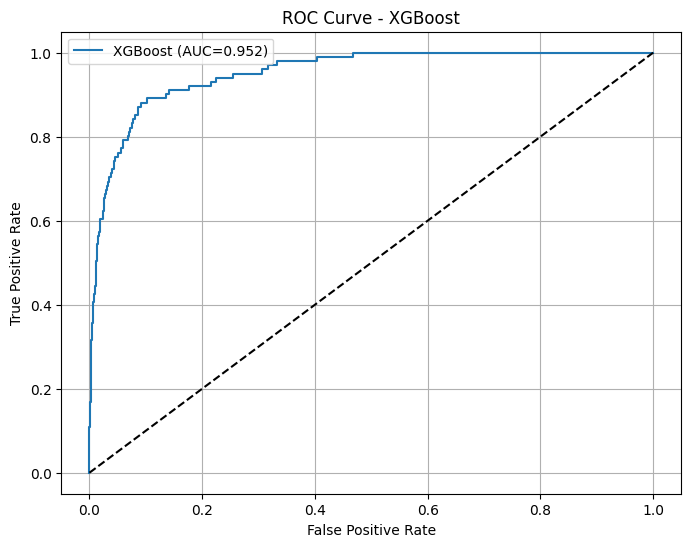

In [58]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_val, xgb_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC={roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.grid(True)
plt.show()

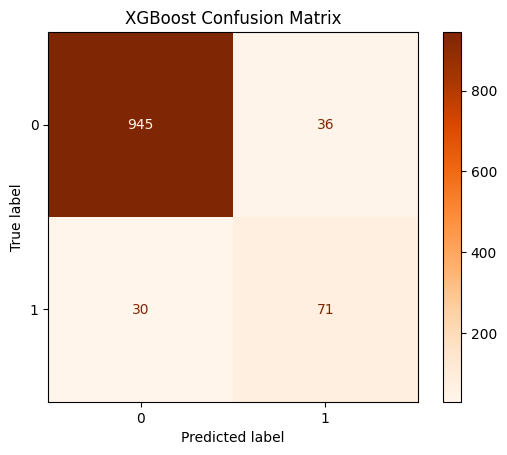

In [59]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_val, xgb_preds, cmap='Oranges')
plt.title("XGBoost Confusion Matrix")
plt.show()

In [62]:
# Predict on test dataset
# 1️⃣ Load Test Datasets
test_main = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Test-1542969243754.csv")
test_beneficiary = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Test_Beneficiarydata-1542969243754.csv")
test_inpatient = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Test_Inpatientdata-1542969243754.csv")
test_outpatient = pd.read_csv("/home/mubasshir/Desktop/Research/Insurance/Dataset/archive/Test_Outpatientdata-1542969243754.csv")

test_df = prepare_provider_features(test_main, test_beneficiary, test_inpatient, test_outpatient, is_train=False)
X_test_final = test_df.drop(columns=['Provider'])

xgb_test_probs = xgb_clf.predict_proba(X_test_final)[:, 1]
xgb_test_preds = (xgb_test_probs >= 0.5).astype(int)

# Save predictions
xgb_result_df = pd.DataFrame({
    'Provider': test_df['Provider'],
    'PredictedFraud_XGB': xgb_test_preds,
    'FraudProbability_XGB': xgb_test_probs
})

xgb_result_df.to_csv("fraud_prediction_results_XGB.csv", index=False)

print("\n✅ XGBoost predictions on test dataset saved as 'fraud_prediction_results_XGB.csv'.")
display(xgb_result_df.head())


✅ XGBoost predictions on test dataset saved as 'fraud_prediction_results_XGB.csv'.


,Provider,PredictedFraud_XGB,FraudProbability_XGB
0,PRV51002,0,0.003387
1,PRV51006,0,0.003993
2,PRV51009,0,0.000226
3,PRV51010,0,0.004689
4,PRV51018,0,0.011164
